# Entrenamiento CNN CIFAR-10

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

### Obtención dataset CIFAR10

El conjunto de datos CIFAR10 contiene 60 000 imágenes en color en 10 clases, con 6000 imágenes en cada clase. El conjunto de datos se divide en 50 000 imágenes de entrenamiento y 10 000 imágenes de prueba. Las clases son mutuamente excluyentes y no hay superposición entre ellas.

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train/ 255.0, X_test / 255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [9]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [10]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## Exploración

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


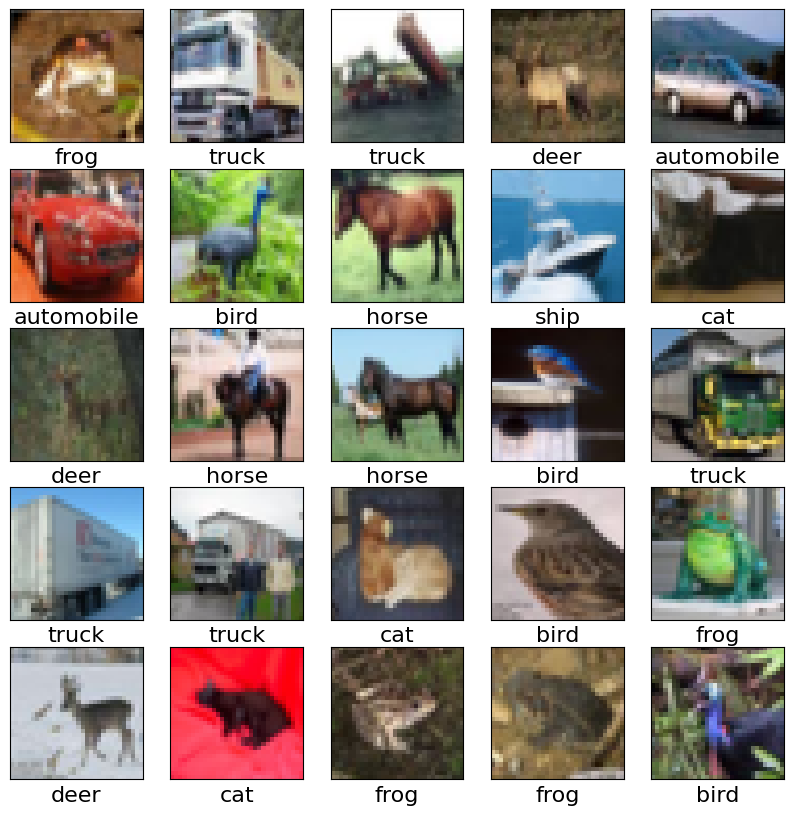

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## Preprocesamiento

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train)

In [14]:
y_test = to_categorical(y_test)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## Implementar arquitectura Fully Connected

In [17]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [18]:
# Modelo
model = Sequential()
model.add( Flatten(input_shape=(32, 32, 3)))
model.add( Dense(512, activation='relu') )
model.add( Dropout(0.2))  # tecnica de regularizacion para prevenir ooverfitting
model.add( Dense(512, activation='relu'))
model.add( Dense(10, activation='softmax') )

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=80, batch_size=128, verbose=2, validation_data=(X_test, y_test))

Epoch 1/80
391/391 - 4s - loss: 1.9423 - accuracy: 0.3013 - val_loss: 1.7575 - val_accuracy: 0.3783 - 4s/epoch - 11ms/step
Epoch 2/80
391/391 - 2s - loss: 1.7748 - accuracy: 0.3610 - val_loss: 1.6762 - val_accuracy: 0.3956 - 2s/epoch - 4ms/step
Epoch 3/80
391/391 - 1s - loss: 1.7061 - accuracy: 0.3860 - val_loss: 1.6245 - val_accuracy: 0.4203 - 1s/epoch - 4ms/step
Epoch 4/80
391/391 - 2s - loss: 1.6707 - accuracy: 0.3977 - val_loss: 1.5855 - val_accuracy: 0.4338 - 2s/epoch - 4ms/step
Epoch 5/80
391/391 - 2s - loss: 1.6286 - accuracy: 0.4128 - val_loss: 1.5697 - val_accuracy: 0.4399 - 2s/epoch - 4ms/step
Epoch 6/80
391/391 - 2s - loss: 1.6026 - accuracy: 0.4222 - val_loss: 1.5681 - val_accuracy: 0.4358 - 2s/epoch - 5ms/step
Epoch 7/80
391/391 - 2s - loss: 1.5807 - accuracy: 0.4289 - val_loss: 1.5233 - val_accuracy: 0.4590 - 2s/epoch - 4ms/step
Epoch 8/80
391/391 - 2s - loss: 1.5741 - accuracy: 0.4301 - val_loss: 1.5438 - val_accuracy: 0.4574 - 2s/epoch - 4ms/step
Epoch 9/80
391/391 - 2s

In [22]:
# Evaluacion

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


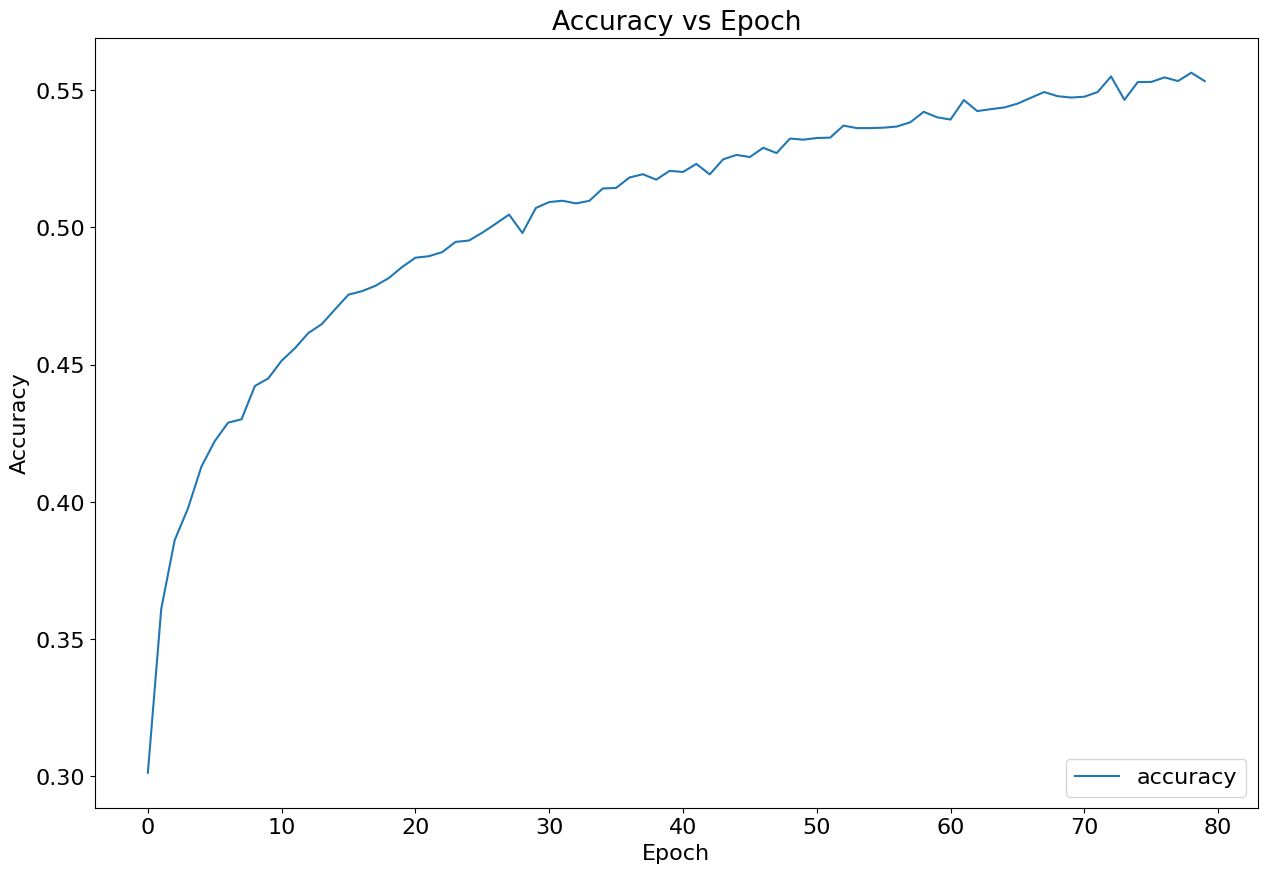

In [23]:
# grafico loss/accuracy v/s epoch
# grafico loss/accuracy v/s epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


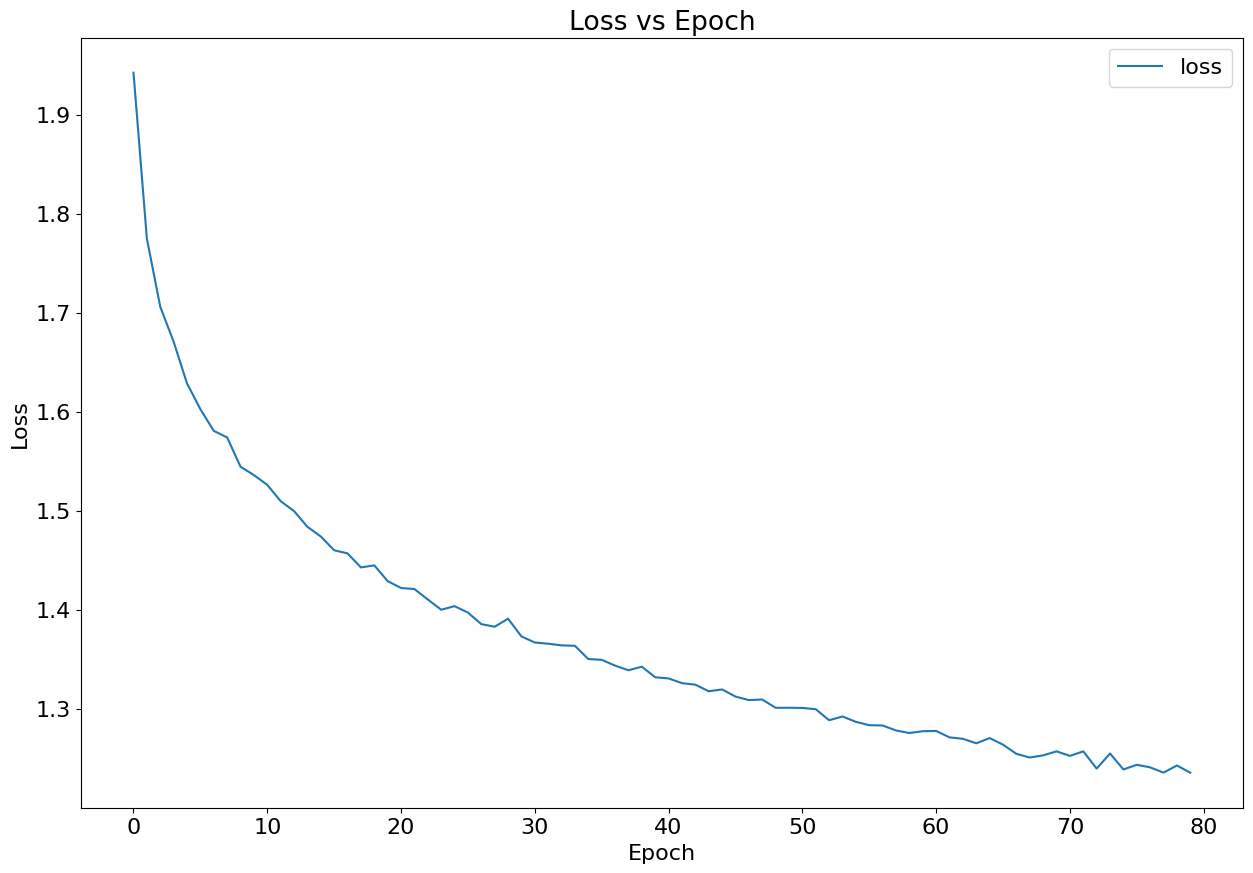

In [24]:
plt.plot(history.history['loss'], label='loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [28]:
import numpy as np

In [29]:
y_pred_clases = np.argmax(y_pred,axis=1)

In [30]:
y_pred_clases

array([5, 8, 8, ..., 3, 0, 7])

In [31]:
y_test_clases = np.argmax(y_test,axis=1)

In [32]:
accuracy_score(y_pred_clases,y_test_clases)

0.5172

## Implementar Arquitectura CNN

In [33]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [34]:
# Modelo
model2 = Sequential()
model2.add( Input(shape=(32,32,3)))
model2.add( Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add( MaxPooling2D(pool_size=(2,2)))
model2.add( Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add( MaxPooling2D(pool_size=(2,2)))
model2.add( Flatten())
model2.add( Dropout(0.5))
model2.add( Dense(10, activation= 'softmax'))

In [35]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2304)             

In [36]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# Entrenamiento
history2 = model2.fit(X_train, y_train, epochs=40, batch_size=128, verbose=2, validation_data=(X_test,y_test))


Epoch 1/40
391/391 - 9s - loss: 1.6755 - accuracy: 0.3955 - val_loss: 1.3940 - val_accuracy: 0.5158 - 9s/epoch - 22ms/step
Epoch 2/40
391/391 - 2s - loss: 1.3778 - accuracy: 0.5104 - val_loss: 1.2608 - val_accuracy: 0.5603 - 2s/epoch - 5ms/step
Epoch 3/40
391/391 - 2s - loss: 1.2695 - accuracy: 0.5537 - val_loss: 1.1639 - val_accuracy: 0.6015 - 2s/epoch - 5ms/step
Epoch 4/40
391/391 - 2s - loss: 1.2012 - accuracy: 0.5794 - val_loss: 1.1177 - val_accuracy: 0.6133 - 2s/epoch - 5ms/step
Epoch 5/40
391/391 - 3s - loss: 1.1467 - accuracy: 0.5998 - val_loss: 1.0669 - val_accuracy: 0.6366 - 3s/epoch - 6ms/step
Epoch 6/40
391/391 - 2s - loss: 1.1042 - accuracy: 0.6144 - val_loss: 1.0198 - val_accuracy: 0.6504 - 2s/epoch - 6ms/step
Epoch 7/40
391/391 - 2s - loss: 1.0725 - accuracy: 0.6269 - val_loss: 0.9928 - val_accuracy: 0.6661 - 2s/epoch - 5ms/step
Epoch 8/40
391/391 - 2s - loss: 1.0427 - accuracy: 0.6405 - val_loss: 0.9830 - val_accuracy: 0.6700 - 2s/epoch - 5ms/step
Epoch 9/40
391/391 - 2s

In [38]:
# Evaluacion
y_ppred = model2.predict(X_test)


313/313 [==============================] - 1s 2ms/step


In [39]:
y_ppred_clases = np.argmax(y_ppred,axis=1)

In [40]:
accuracy_score(y_ppred_clases,y_test_clases)

0.7314

In [41]:
from sklearn.metrics import confusion_matrix

In [44]:
print(confusion_matrix(y_ppred_clases,y_test_clases))

[[788  25  57  13  16   9   3  10  81  39]
 [ 15 835   3   5   0   0   0   1  32  59]
 [ 43   3 568  49  50  39  34  22  13   9]
 [ 32  12  78 549  64 133  76  35  29  20]
 [ 16   5  75  54 681  28  35  46   9   8]
 [ 13   8  92 224  54 735  34  90  14  17]
 [  6  17  80  60  68  15 809   5  14  14]
 [ 16   9  41  35  62  40   5 783   9  29]
 [ 48  16   4   6   4   0   2   1 779  18]
 [ 23  70   2   5   1   1   2   7  20 787]]


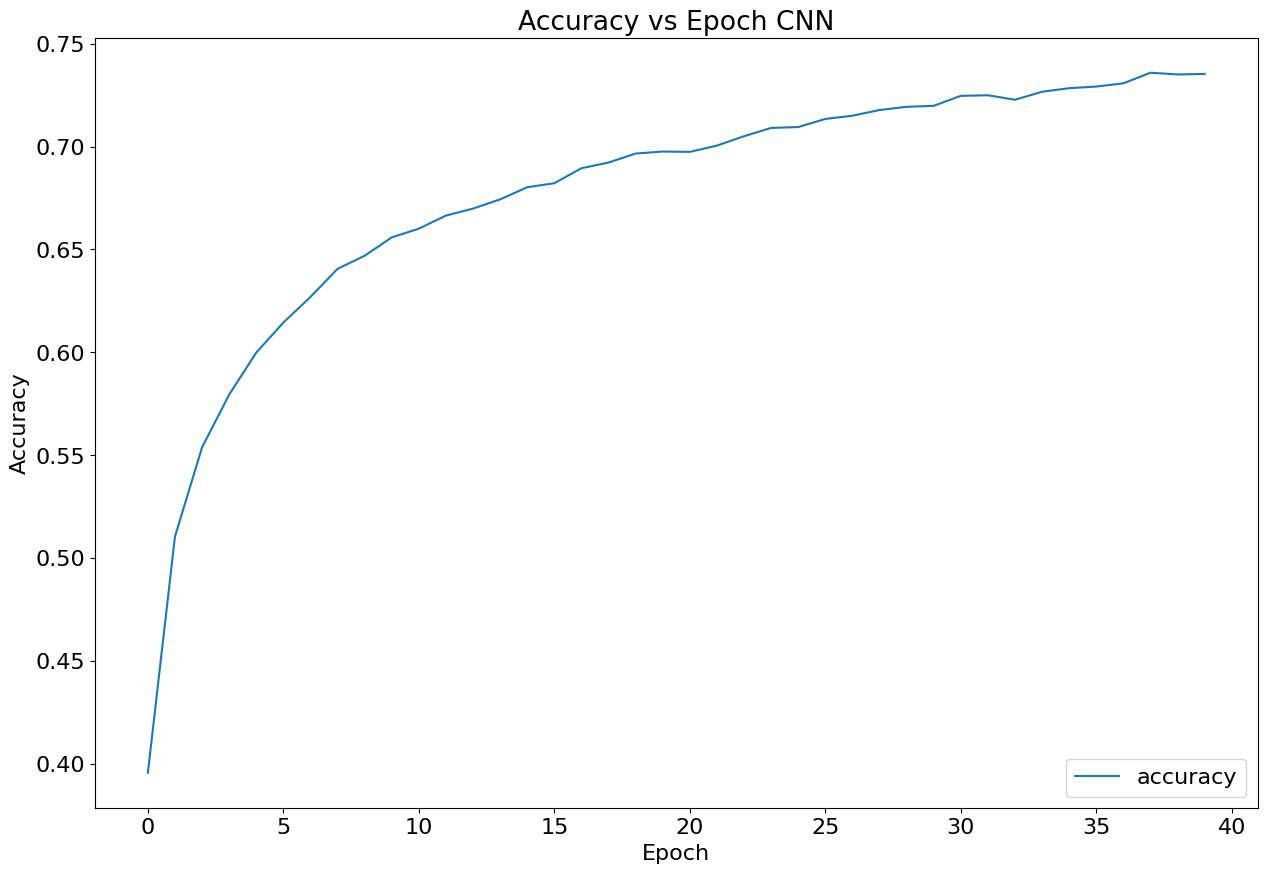

In [45]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.title('Accuracy vs Epoch CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')



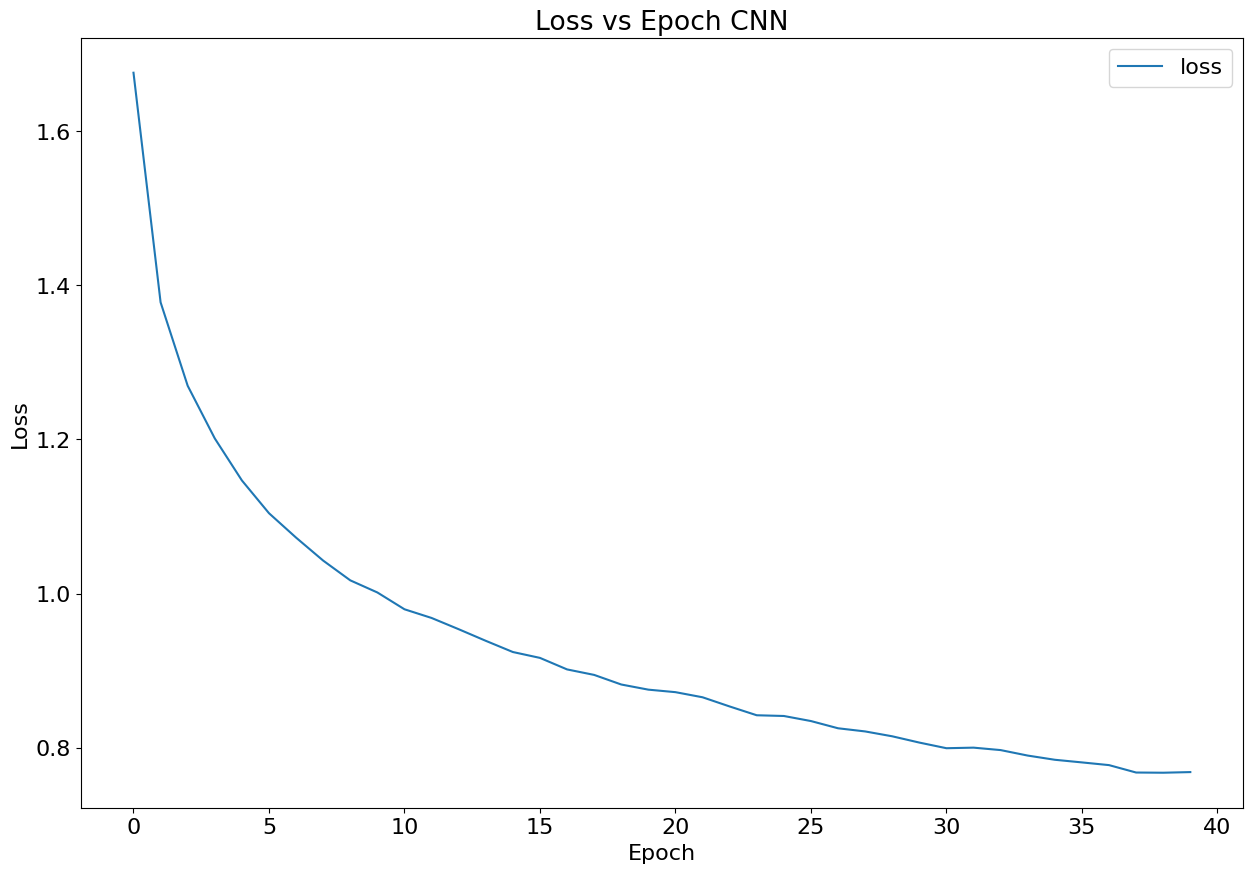

In [46]:
plt.plot(history2.history['loss'], label='loss')
plt.title('Loss vs Epoch CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')